In [1]:
import sys

from common.config import get_config

from common.generate_images_labels import get_images_labels_list
from common.generate_images_labels import write_images_labels_to_file


def main():
    images_source = 'train'
    if images_source not in ['train', 'test']:
        print("Invalid image-source '{}'!".format(images_source))
        return

    images_dir_path = get_config('{}ing_images_dir_path'.format(images_source))
    images_labels_path = get_config(
        '{}ing_images_labels_path'.format(images_source))

    print("Gathering info about images at path '{}'...".format(images_dir_path))
    images_labels_list = get_images_labels_list(images_dir_path)
    print("Done!")

    print("Writing images labels info to file at path '{}'...".format(
        images_labels_path))
    write_images_labels_to_file(images_labels_list, images_labels_path)
    print("Done!")
    
    images_source = 'test'
    if images_source not in ['train', 'test']:
        print("Invalid image-source '{}'!".format(images_source))
        return

    images_dir_path = get_config('{}ing_images_dir_path'.format(images_source))
    images_labels_path = get_config(
        '{}ing_images_labels_path'.format(images_source))

    print("Gathering info about images at path '{}'...".format(images_dir_path))
    images_labels_list = get_images_labels_list(images_dir_path)
    print("Done!")

    print("Writing images labels info to file at path '{}'...".format(
        images_labels_path))
    write_images_labels_to_file(images_labels_list, images_labels_path)
    print("Done!")


if __name__ == '__main__':
    main()

Gathering info about images at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\images\train'...
Done!
Writing images labels info to file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\training_images_labels.txt'...
Done!
Gathering info about images at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\images\test'...
Done!
Writing images labels info to file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\testing_images_labels.txt'...
Done!


In [2]:
"""
Takes a set of images as inputs, transforms them using multiple algorithms to
make it suitable for ingestion into ML routines, then finally outputs them
to disk.
"""
import csv
import traceback

import numpy as np
import cv2

from common.config import get_config
from common.image_transformation import apply_image_transformation


def write_frame_to_file(frame, frame_label, writer):
    """
    Convert the multi-dimensonal array of the image to a one-dimensional one
    and write it to a file, along with its label.
    """
   # print("Writing frame to file...")

    flattened_frame = frame.flatten()
    output_line = [frame_label] + np.array(flattened_frame).tolist()
    writer.writerow(output_line)

    #print("Done!")


def main():
    images_transformed_path = get_config('images_transformed_path')
    with open(images_transformed_path, 'w') as output_file:
        writer = csv.writer(output_file, delimiter=',')

        training_images_labels_path = get_config('training_images_labels_path')
        with open(training_images_labels_path, 'r') as file:
            lines = file.readlines()

        for line in lines:
            #print("\n\n" + line.strip())
            image_path, image_label = line.split()

            # Read the input image.
            frame = cv2.imread(image_path)
            # `frame` is a HxW numpy ndarray of triplets (pixels), where H and W are
            # the dimensions of the input image.
            # cv2.imshow("Original", frame)
            try:
                frame = apply_image_transformation(frame)
                write_frame_to_file(frame, image_label, writer)
            except Exception:
                exception_traceback = traceback.format_exc()
                print("Error while applying image transformation on image path '{}' with the following exception trace:\n{}".format(
                    image_path, exception_traceback))
                continue
            # cv2.waitKey(1000)
    cv2.destroyAllWindows()
    print ("The program completed successfully !!")


if __name__ == '__main__':
    main()

The program completed successfully !!


In [3]:
"""
Takes a set of images as inputs, transforms them using multiple algorithms to
make it suitable for ingestion into ML routines, then finally outputs them
to disk.
"""
import csv
import traceback

import numpy as np
import cv2

from common.config import get_config
from common.image_transformation import apply_image_transformation


def write_frame_to_file(frame, frame_label, writer):
    """
    Convert the multi-dimensonal array of the image to a one-dimensional one
    and write it to a file, along with its label.
    """
   # print("Writing frame to file...")

    flattened_frame = frame.flatten()
    output_line = [frame_label] + np.array(flattened_frame).tolist()
    writer.writerow(output_line)

    #print("Done!")


def main():
    images_transformed_path = get_config('images_transformed_path')
    with open(images_transformed_path, 'w') as output_file:
        writer = csv.writer(output_file, delimiter=',')

        testing_images_labels_path = get_config('testing_images_labels_path')
        with open(testing_images_labels_path, 'r') as file:
            lines = file.readlines()

        for line in lines:
            #print("\n\n" + line.strip())
            image_path, image_label = line.split()

            # Read the input image.
            frame = cv2.imread(image_path)
            # `frame` is a HxW numpy ndarray of triplets (pixels), where H and W are
            # the dimensions of the input image.
            # cv2.imshow("Original", frame)
            try:
                frame = apply_image_transformation(frame)
                write_frame_to_file(frame, image_label, writer)
            except Exception:
                exception_traceback = traceback.format_exc()
                print("Error while applying image transformation on image path '{}' with the following exception trace:\n{}".format(
                    image_path, exception_traceback))
                continue
            # cv2.waitKey(1000)
    cv2.destroyAllWindows()
    print ("The program completed successfully !!")


if __name__ == '__main__':
    main()

The program completed successfully !!


In [4]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'GaussianNB'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\GaussianNB\stats-GaussianNB.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating GaussianNB model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\GaussianNB\model-serialized-GaussianNB.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'knn'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\knn\stats-knn.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating KNN model with number of neighbours = '10'...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\knn\model-serialized-knn.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



In [6]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'svm'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\svm\stats-svm.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating SVM model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\svm\model-serialized-svm.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



In [7]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'logistic'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\logistic\stats-logistic.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating Logistic-regression model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\logistic\model-serialized-logistic.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



In [8]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'LinearDiscriminantAnalysis'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\LinearDiscriminantAnalysis\stats-LinearDiscriminantAnalysis.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating LinearDiscriminantAnalysis model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\LinearDiscriminantAnalysis\model-serialized-LinearDiscriminantAnalysis.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [9]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'RandomForest'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\RandomForest\stats-RandomForest.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating RandomForest model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\RandomForest\model-serialized-RandomForest.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



In [10]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'ExtraTrees'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\ExtraTrees\stats-ExtraTrees.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating ExtraTree Classifier model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\ExtraTrees\model-serialized-ExtraTrees.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



In [11]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'DecisionTree'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\DecisionTree\stats-DecisionTree.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating DecisionTree model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\DecisionTree\model-serialized-DecisionTree.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'AdaBoost'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting','GradientBoosting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\AdaBoost\stats-AdaBoost.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating AdaBoosting Classifier model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\AdaBoost\model-serialized-AdaBoost.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'GradientBoosting'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting','GradientBoosting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\GradientBoosting\stats-GradientBoosting.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating GradientBoosting model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\GradientBoosting\model-serialized-GradientBoosting.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!



In [15]:
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from common.config import get_config


def print_with_precision(num):
    return "%0.5f" % num


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def generate_LinearDiscriminantAnalysis_classifier():
    print("\nGenerating LinearDiscriminantAnalysis model...")
    classifier_model = LinearDiscriminantAnalysis()
    print("Done!\n")
    return classifier_model

def generate_Bagging_classifier():
    print("\nGenerating Bagging Classifier model...")
    classifier_model = BaggingClassifier()
    print("Done!\n")
    return classifier_model

def generate_ExtraTrees_classifier():
    print("\nGenerating ExtraTree Classifier model...")
    classifier_model = ExtraTreesClassifier()
    print("Done!\n")
    return classifier_model

def generate_AdaBoost_classifier():
    print("\nGenerating AdaBoosting Classifier model...")
    classifier_model =AdaBoostClassifier()
    print("Done!\n")
    return classifier_model

def generate_GradientBoosting_classifier():
    print("\nGenerating GradientBoosting model...")
    classifier_model = GradientBoostingClassifier()
    print("Done!\n")
    return classifier_model

def generate_Voting_classifier():
    print("\nGenerating VotingClassifier model...")
    estimators = []
    model1 = BaggingClassifier()
    estimators.append(('baggingclassifier', model1))
    model2 = DecisionTreeClassifier()
    estimators.append(('cart', model2))
    model3 = ExtraTreesClassifier()
    estimators.append(('ETC', model3))
    # create the ensemble model
    classifier_model = VotingClassifier(estimators)
    print("Done!\n")
    return classifier_model

def generate_classifier(model_name):
    classifier_generator_function_name = "generate_{}_classifier".format(
        model_name)
    return globals()[classifier_generator_function_name]()


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


def main():
    model_name = 'Voting'
    if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
                      'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting','GradientBoosting']:
        print("Invalid model-name '{}'!".format(model_name))
        return

    model_output_dir_path = get_config(
        'model_{}_output_dir_path'.format(model_name))
    model_stats_file_path = os.path.join(
        model_output_dir_path, "stats-{}.txt".format(model_name))
    print("Model stats will be written to the file at path '{}'.".format(
        model_stats_file_path))

    with open(model_stats_file_path, "w") as model_stats_file:
        images_transformed_path = get_config('images_transformed_path')
        images, labels = read_images_transformed(images_transformed_path)
        classifier_model = generate_classifier(model_name)

        model_stats_file.write("Model used = '{}'".format(model_name))
        model_stats_file.write(
            "Classifier model details:\n{}\n\n".format(classifier_model))
        training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
            images, labels, 0.2)
        
        print("\nTraining the model...")
        classifier_model = classifier_model.fit(
            training_images, training_labels)
        print("Done!\n")

        model_serialized_path = get_config(
            'model_{}_serialized_path'.format(model_name))
        print("\nDumping the trained model to disk at path '{}'...".format(
            model_serialized_path))
        joblib.dump(classifier_model, model_serialized_path)
        print("Dumped\n")

        print("\nWriting model stats to file...")
        score = classifier_model.score(testing_images, testing_labels)
        model_stats_file.write(
            "Model score:\n{}\n\n".format(print_with_precision(score)))

        predicted = classifier_model.predict(testing_images)
        report = metrics.classification_report(testing_labels, predicted)
        model_stats_file.write(
            "Classification report:\n{}\n\n".format(report))
        print("Done!\n")

        print("\nFinished!\n")


if __name__ == '__main__':
    main()

Model stats will be written to the file at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\Voting\stats-Voting.txt'.

Reading the transformed images file located at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\images_transformed.csv'...
Done!


Generating VotingClassifier model...
Done!


Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Dumping the trained model to disk at path 'C:\Users\Subham\Documents\Indian-Sign-Language\data\generated\output\Voting\model-serialized-Voting.pkl'...
Dumped


Writing model stats to file...
Done!


Finished!




Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!

Cost after epoch 0: 0.005013
Cost after epoch 5: 0.004848
Cost after epoch 10: 0.004817
Cost after epoch 15: 0.004790
Cost after epoch 20: 0.004757
Cost after epoch 25: 0.004709
Cost after epoch 30: 0.004635
Cost after epoch 35: 0.004520
Cost after epoch 40: 0.004356
Cost after epoch 45: 0.004135
Cost after epoch 50: 0.004191
Cost after epoch 55: 0.003800
Cost after epoch 60: 0.003416
Cost after epoch 65: 0.005648
Cost after epoch 70: 0.003834
Cost after epoch 75: 0.003319
Cost after epoch 80: 0.002928
Cost after epoch 85: 0.004492
Cost after epoch 90: 0.002732
Cost after epoch 95: 0.002594
Cost after epoch 100: 0.003340
Cost after epoch 105: 0.002317
Cost after epoch 110: 0.003418
Cost after epoch 115: 0.001945
Cost after epoch 120: 0.003471
Cost after epoch 125: 0.001857
Cost after epoch 130: 0.001533
Cost after epoch 135: 0.002479
Cost after epoch 140: 0.001633
Cost after epoch 145: 0.001292
Cost after epoch 150

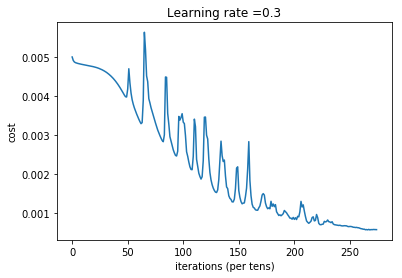

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.893964
Test Accuracy: 0.779221
Done!



In [16]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 20 02:26:11 2017

@author: Sanghai
"""
import sys

from common.config import get_config
import os
import sys
import csv
from sklearn.model_selection import train_test_split
import csv
import traceback

import numpy as np
import cv2

from common.config import get_config
from common.image_transformation import apply_image_transformation
from common.generate_images_labels import get_images_labels_list
from common.generate_images_labels import write_images_labels_to_file
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import cv2

    
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32,shape=(None,n_H0,n_W0,n_C0))
    Y = tf.placeholder(tf.float32,shape=(None,n_y))
    ### END CODE HERE ###
    
    return X, Y


def vec_translate(a):
    my_dict = {'a':0,'b':1,'d':2,'e':3,'f':4,'g':5,'h':6,'j':7,'k':8,'m':9,
               'n':10,'o':11,'p':12,'q':13,'r':14,'s':15,'t':16,'x':17,'y':18,
               'z':19}
    return np.vectorize(my_dict.__getitem__)(a)

def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1",[4,4,1,8],initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2",[2,2,8,16],initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2, 20, activation_fn=None)
    ### END CODE HERE ###

    return Z3

# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    ### END CODE HERE ###
    
    return cost

# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.3,
          num_epochs = 275, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3
    X_train = np.reshape(X_train,[-1,30,30,1])
    X_test = np.reshape(X_test,[-1,30,30,1])                                      # to keep results consistent (numpy seed)
    (m, n_H0, n_W0,n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X,parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.MomentumOptimizer(0.3,0.3).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            #print(type(X_train))
            #print(type(Y_train))
            #num_minibatches = int(int(m) / int(minibatch_size)) # number of minibatches of size minibatch_size in the train set
            #seed = seed + 1
            #minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            #for minibatch in minibatches:

                # Select a minibatch
                #(minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
            _ , temp_cost = sess.run([optimizer,cost],feed_dict={X: X_train, Y: Y_train})
                ### END CODE HERE ###
                
            minibatch_cost += temp_cost / X_train.shape[0]
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters
    

def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels

def main():
    images_transformed_path = get_config('images_transformed_path')
    images_transformed_path = get_config('images_transformed_path')
    with open(images_transformed_path, 'w') as output_file:
        writer = csv.writer(output_file, delimiter=',')

        training_images_labels_path = get_config('training_images_labels_path')
        with open(training_images_labels_path, 'r') as file:
            lines = file.readlines()
        images = []
        labels = []
        for line in lines:
            #print("\n\n" + line.strip())
            image_path, image_label = line.split()

            # Read the input image.
            frame = cv2.imread(image_path)
            # `frame` is a HxW numpy ndarray of triplets (pixels), where H and W are
            # the dimensions of the input image.
            # cv2.imshow("Original", frame)
            frame = apply_image_transformation(frame)
            images.append(frame)
            labels.append(image_label)
            
                
        X_train, X_test, Y_train, Y_test = divide_data_train_test(
                images, labels, 0.2)
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        Y_train = vec_translate(Y_train)
        X_test=np.array(X_test)
        Y_test=vec_translate(Y_test)
        Y_test=np.array(Y_test)
        X_train = X_train/255.
        X_test = X_test/255.
        
        Y_train = convert_to_one_hot(Y_train, 20).T
        Y_test = convert_to_one_hot(Y_test, 20).T
        #print(X_train.shape)
    _, _, parameters = model(X_train, Y_train, X_test, Y_test)
        
        
        
    print("Done!\n")


if __name__ == '__main__':
    main()

In [ ]:
# import sys
# import traceback

# import cv2
# from sklearn.externals import joblib

# from common.config import get_config
# from common.image_transformation import apply_image_transformation
# import warnings

# def main():
#     warnings.filterwarnings('ignore')
#     model_name = 'logistic'
#     if model_name not in ['svm', 'logistic', 'knn']:
#         print("Invalid model-name '{}'!".format(model_name))
#         return

#     #print("Using model '{}'...".format(model_name))

#     model_serialized_path = get_config(
#         'model_{}_serialized_path'.format(model_name))
#     #print("Model deserialized from path '{}'".format(model_serialized_path))

#     testing_images_labels_path = get_config('testing_images_labels_path')
#     with open(testing_images_labels_path, 'r') as file:
#         lines = file.readlines()
#         total = 0
#         cnt = 0
#         for line in lines:
#             #print("\n\n" + line.strip())
#             total += 1
#             image_path, image_label = line.split()
#             frame = cv2.imread(image_path)
#             try:
#                 frame = apply_image_transformation(frame)
#                 frame_flattened = frame.flatten()
#                 classifier_model = joblib.load(model_serialized_path)
#                 predicted_labels = classifier_model.predict(frame_flattened)
#                 predicted_label = predicted_labels[0]
#                 #print("Predicted label = {}".format(predicted_label))

#                 if image_label != predicted_label:
#                     cnt += 1
#                     cv2.waitKey(5000)
#             except Exception:
#                 exception_traceback = traceback.format_exc()
#                 print("Error while applying image transformation on image path '{}' with the following exception trace:\n{}".format(
#                     image_path, exception_traceback))
#                 continue
#     print(str(cnt)+" "+str(total))
#     cv2.destroyAllWindows()
#     #print ("The program completed successfully !!")


# if __name__ == '__main__':
#     main()

In [ ]:
# import os
# import sys
# import csv
# import numpy
# from matplotlib import pyplot
# from pandas import read_csv
# from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# import numpy as np
# from sklearn import metrics
# from sklearn import linear_model
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.externals import joblib
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import VotingClassifier

# from common.config import get_config


# def print_with_precision(num):
#     return "%0.5f" % num


# def read_images_transformed(images_transformed_path):
#     print("\nReading the transformed images file located at path '{}'...".format(
#         images_transformed_path))

#     images = []
#     labels = []
#     with open(images_transformed_path) as images_transformed_file:
#         reader = csv.reader(images_transformed_file, delimiter=',')
#         cnt = 0
#         for line in reader:
#             if len(line)==0:
#                 continue
#             cnt = cnt + 1
#             label = line[0]
#             labels.append(label)
#             image = line[1:]
#             image_int = [int(pixel) for pixel in image]
#             image = np.array(image_int)
#             images.append(image)
#     print("Done!\n")
#     return images, labels


# def generate_knn_classifier():
#     num_neighbours = 10
#     print("\nGenerating KNN model with number of neighbours = '{}'...".format(
#         num_neighbours))
#     classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
#     print("Done!\n")
#     return classifier_model


# def generate_logistic_classifier():
#     print("\nGenerating Logistic-regression model...")
#     classifier_model = linear_model.LogisticRegression()
#     print("Done!\n")
#     return classifier_model


# def generate_GaussianNB_classifier():
#     print("\nGenerating GaussianNB model...")
#     classifier_model = GaussianNB()
#     print("Done!\n")
#     return classifier_model

# def generate_DecisionTree_classifier():
#     print("\nGenerating DecisionTree model...")
#     classifier_model = DecisionTreeClassifier()
#     print("Done!\n")
#     return classifier_model

# def generate_RandomForest_classifier():
#     print("\nGenerating RandomForest model...")
#     classifier_model = RandomForestClassifier()
#     print("Done!\n")
#     return classifier_model

# def generate_svm_classifier():
#     print("\nGenerating SVM model...")
#     classifier_model = svm.SVC(kernel='poly', degree = 1)
#     print("Done!\n")
#     return classifier_model

# def generate_LinearDiscriminantAnalysis_classifier():
#     print("\nGenerating LinearDiscriminantAnalysis model...")
#     classifier_model = LinearDiscriminantAnalysis()
#     print("Done!\n")
#     return classifier_model

# def generate_Bagging_classifier():
#     print("\nGenerating Bagging Classifier model...")
#     classifier_model = BaggingClassifier()
#     print("Done!\n")
#     return classifier_model

# def generate_ExtraTrees_classifier():
#     print("\nGenerating ExtraTree Classifier model...")
#     classifier_model = ExtraTreesClassifier()
#     print("Done!\n")
#     return classifier_model

# def generate_AdaBoost_classifier():
#     print("\nGenerating AdaBoosting Classifier model...")
#     classifier_model =AdaBoostClassifier()
#     print("Done!\n")
#     return classifier_model

# def generate_GradientBoosting_classifier():
#     print("\nGenerating GradientBoosting model...")
#     classifier_model = GradientBoostingClassifier()
#     print("Done!\n")
#     return classifier_model

# def generate_Voting_classifier():
#     print("\nGenerating VotingClassifier model...")
#     model1 = BaggingClassifier()
#     estimators.append(('baggingclassifier', model1))
#     model2 = DecisionTreeClassifier()
#     estimators.append(('cart', model2))
#     model3 = ExtraTreesClassifier()
#     estimators.append(('ETC', model3))
#     # create the ensemble model
#     classifier_model = VotingClassifier(estimators)
#     print("Done!\n")
#     return classifier_model

# def generate_classifier(model_name):
#     classifier_generator_function_name = "generate_{}_classifier".format(
#         model_name)
#     return globals()[classifier_generator_function_name]()


# def divide_data_train_test(images, labels, ratio):
#     print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
#     ret = train_test_split(images, labels, test_size=ratio, random_state=0)
#     print("Done!\n")
#     return ret


# def main():
#     model_name = 'GaussianNB'
#     if model_name not in ['svm', 'logistic', 'knn','DecisionTree','RandomForest','GaussianNB','LinearDiscriminantAnalysis', 
#                       'Bagging' , 'ExtraTrees', 'AdaBoost' , 'Voting']:
#         print("Invalid model-name '{}'!".format(model_name))
#         return

#     model_output_dir_path = get_config(
#         'model_{}_output_dir_path'.format(model_name))
#     model_stats_file_path = os.path.join(
#         model_output_dir_path, "stats-{}.txt".format(model_name))
#     print("Model stats will be written to the file at path '{}'.".format(
#         model_stats_file_path))

#     with open(model_stats_file_path, "w") as model_stats_file:
#         images_transformed_path = get_config('images_transformed_path')
#         images, labels = read_images_transformed(images_transformed_path)
#         classifier_model = generate_classifier(model_name)

#         model_stats_file.write("Model used = '{}'".format(model_name))
#         model_stats_file.write(
#             "Classifier model details:\n{}\n\n".format(classifier_model))
#         training_images, testing_images, training_labels, testing_labels = divide_data_train_test(
#             images, labels, 0.2)
        
#         print("\nTraining the model...")
#         classifier_model = classifier_model.fit(
#             training_images, training_labels)
#         print("Done!\n")

#         model_serialized_path = get_config(
#             'model_{}_serialized_path'.format(model_name))
#         print("\nDumping the trained model to disk at path '{}'...".format(
#             model_serialized_path))
#         joblib.dump(classifier_model, model_serialized_path)
#         print("Dumped\n")

#         print("\nWriting model stats to file...")
#         score = classifier_model.score(testing_images, testing_labels)
#         model_stats_file.write(
#             "Model score:\n{}\n\n".format(print_with_precision(score)))

#         predicted = classifier_model.predict(testing_images)
#         report = metrics.classification_report(testing_labels, predicted)
#         model_stats_file.write(
#             "Classification report:\n{}\n\n".format(report))
#         print("Done!\n")

#         print("\nFinished!\n")


# if __name__ == '__main__':
#     main()